# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - изучить рынок недвижимости в 2014-2019гг и оценить:
    
1. Какими объектами представлен рынок по площади, цене, количеству комнат и высоте потолков 
2. Какие факторы больше всего влияют на стоимость квартиры
3. Какая область входит в центр Санкт-Петербурга
4. Какие факторы влияют на цену недвижимости в центре города и отличаются ли они от общей выборки

**Ход исследования**
    
Статистика о платежеспособности клиентов предоставлена банком. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится обзор данных и предобработка. 
Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [3]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4992,0,1950000.0,36.0,2017-12-10T00:00:00,1,NaN,12.0,NaN,7,NaN,...,NaN,NaN,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,44.0
13196,16,5300000.0,52.0,2017-12-14T00:00:00,2,2.84,15.0,30.7,14,NaN,...,8.0,1.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,30.0
8931,9,5350000.0,56.2,2015-08-19T00:00:00,2,2.66,14.0,33.1,4,False,...,10.7,0.0,Санкт-Петербург,28877.0,11738.0,0.0,NaN,1.0,226.0,389.0
11338,17,3500000.0,72.0,2019-03-24T00:00:00,3,2.50,5.0,43.2,4,NaN,...,8.6,NaN,Приозерск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12297,12,5250000.0,70.0,2015-02-11T00:00:00,2,2.60,17.0,40.0,1,NaN,...,11.0,0.0,Санкт-Петербург,32522.0,11972.0,1.0,420.0,0.0,NaN,700.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В файле содержится информация о 23 698 объектах недвижимости Санкт-Петербурга и ближайших населенных пунктов. 
Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод

После изучения данных из файла можно сделать следующие выводы:
* в некоторых колонках есть пропущенные значения, необходимо разобраться с ними
* после заполнения пропусков в некоторых колонках небходимо изменить тип данных, чтобы таблица в целом выглядела более читабельно 
* также можно увидеть некоторые аномальные значения, которые явно искажают выборку, их необходимо проанализировать

## Предобработка данных

Сначала разберемся с пропущенными значениями, чтобы понять, насколько они для нас важны и нужно ли заполнять эти пропуски. 
Наибольшее количество пропусков (88% от всех данных) в колонке 'is_apartment'. Можно предположить, что поле и не заполняли в тех случаях, когда недвижимость не относилась к апартаментам, поэтому заполним пропуски значением False.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Аналогичным образом поступим с данными о балконах. Если нет информации о том, что в квартире есть балкон, значит, скорее всего, его там нет. И сразу же заменим тип данных в этой колонке на целочисленный. 

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype('int8')

Пропуски в 'days_exposition' не будем заполнять каким-либо усредненным значением, чтобы искуственно не увеличивать число дней размещения объявления именно по среднему или медианному значению. Просто поменяем тип данных в этом столбце.

In [7]:
data['days_exposition']=data['days_exposition'].fillna(0).astype('int16')

По количеству парков и водоемов в радиусе 3км пропущено 23% данных. Заменим их на ноль, предположив, что часть объектов недвижимости находится вдалеке от этих объектов. 

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int8')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int8')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

На этапе обзора данных из файла были отмечены некоторые аномалии. Например, в данных о высоте потолков. Минимальное значение 1м, максимальное - 100м. Ни то, ни другое значение не является реалистичным. Ошибка могла возникнуть на этапе ввода информации, хотя трудно однозначно сказать, с чем она связана: где-то напечатали лишний знак, не поставили запятую или просто ошиблись цифрой.
Очевидно, что для работы с данными аномальные значения необходимо заменить на медианное значение по неаномальным. Таким образом, за нормальные значения примем данные от 2,4м до 3,5м. Минимальная высота потолков, по общим сведениям, в "хрущевках" 2,4м, а в "сталинках" или квартирах элитной застройки могут быть до 3,5м. Все, что за рамками данного диапазона будем считать аномальными значениями. 
Заменим аномальные значения медианным и также заполним пропуски в данных. Какая бы квартира не была, потолок в ней должен быть.

In [10]:
min_normal_ceiling_height = 2.4
max_normal_ceiling_height = 3.5
ceiling_height_median = data.query('ceiling_height >= @min_normal_ceiling_height and ceiling_height <= @max_normal_ceiling_height').sort_values(by='ceiling_height').median()
ceiling_height_anomal = data.query('ceiling_height <= @min_normal_ceiling_height and ceiling_height >= @max_normal_ceiling_height')

data.query('ceiling_height <= @min_normal_ceiling_height and ceiling_height >= @max_normal_ceiling_height').fillna(ceiling_height_median)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Разберемся с количеством этажей в доме. Максимальное значение в этой колонке - 60. Из общедоступных источников можно узнать, что самый высокий жилой дом в Санкт-Петербурге 37 этажей. Возможно, 60 - это единичная ошибка, и вместо него должно быть 6, но на всякий случай проверим, есть ли еще значения от 37 до 60

In [11]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Есть 2 аномальных значения - 60 и 52. Кроме этого, есть пропущенные значения, но их крайне мало - 86 строк (менее 1%). Поэтому просто удалим этим данные, они не повлияют на результат исследования, а обработать их невозможно - замена пропусков и аномалий на любое значение (среднее или медиану) выглядит нелогично.

In [12]:
data.dropna(subset=['floors_total'], inplace = True)
data=data.loc[data['floors_total']<52]
data['floors_total']=data['floors_total'].astype('int8')

Незаполненными остались данные по расстоянию от объекта до аэроорта/центра/парков/водоемов, а также некоторые названия населенных пунктов. В данном случае логично оставить эти данные пустыми, а не заполнять их каким-либо усредненным значением. 
Осталось только поменять типы данных.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['last_price'] = data['last_price'].astype('int32')
data[['rooms','floor','total_images']] = data[['rooms','floor','total_images']].astype('int8')
data[['living_area','kitchen_area','total_area']] = data[['living_area','kitchen_area', 'total_area']].astype('float32')

In [14]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23611 non-null  int8          
 1   last_price            23611 non-null  int32         
 2   total_area            23611 non-null  float32       
 3   first_day_exposition  23611 non-null  datetime64[ns]
 4   rooms                 23611 non-null  int8          
 5   ceiling_height        14493 non-null  float64       
 6   floors_total          23611 non-null  int8          
 7   living_area           21741 non-null  float32       
 8   floor                 23611 non-null  int8          
 9   is_apartment          23611 non-null  bool          
 10  studio                23611 non-null  bool          
 11  open_plan             23611 non-null  bool          
 12  kitchen_area          21380 non-null  float32       
 13  balcony         

## Расчёты и добавление результатов в таблицу

In [15]:
data['price_square_meter'] = round(data['last_price']/data['total_area'],1)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,0,120370.4,3,3,2019,другой,0.472,0.231
1,7,3350000,40.400002,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81,82920.8,1,12,2018,первый,0.460,0.272
2,10,5196000,56.000000,2015-08-20,2,NaN,5,34.299999,4,False,...,2,574.0,558,92785.7,3,8,2015,другой,0.612,0.148
3,0,64900000,159.000000,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424,408176.1,4,7,2015,другой,NaN,NaN
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000.0,1,6,2018,другой,0.320,0.410


## Исследовательский анализ данных

Изучим площадь, цену, число комнат, высоту потолков квартир. Для каждого параметра построим гистограмму.

count    23611.000000
mean        60.342171
std         35.650120
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800003
max        900.000000
Name: total_area, dtype: float64

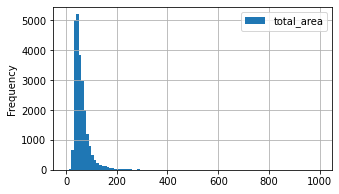

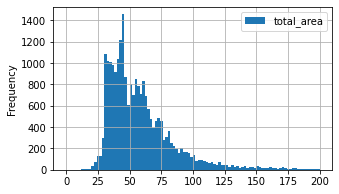

In [17]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,1000))
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,200))
data['total_area'].describe()

На диаграмме представлено нормальное распределение (распределение Гаусса).
75% жилых объектов Санкт-Петербурга и близлижащих районов имеют общую площадь от 40,6 до 70 кв.м. Это вполне логично, т.к. это стандартная площадь 1-3-комнатных квартир. 
Оставшиеся 25% - это небольшие квартиры от 20 до 40,6 кв.м. (скорее всего, апартаменты) и жилые объекты с площадью от 70 до 900 кв.м.

count    2.361100e+04
mean     6.540780e+06
std      1.090216e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

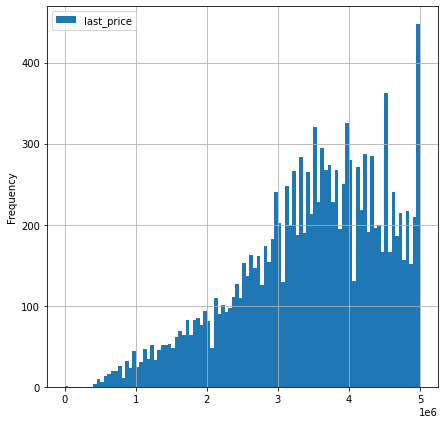

In [18]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,5000000), figsize = (7,7))
data['last_price'].describe()

На диаграмме также нормальное распределение (распределение Гаусса). 75% квартир находятся в диапазоне от 3,4 млн руб. до 6,8 млн руб. Минимальная цена 12 190 руб выглядит как выброс, скорее всего, это ошибочное значение.

In [19]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int8)

count    23611.000000
mean         2.071196
std          1.078403
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

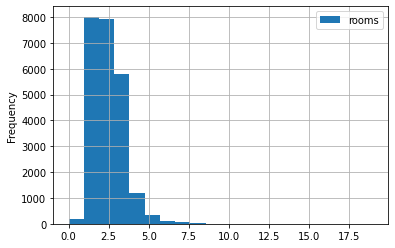

In [20]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True)
data['rooms'].describe()

На рынке недвижимости Санкт-Петербурга наибольшую долю занимают однокомнатные и двухкомнатные квартиры. Также присутствуют аномальные значения (выбросы), но их доля в выборке очень низкая. 

count    14493.000000
mean         2.771496
std          1.261531
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

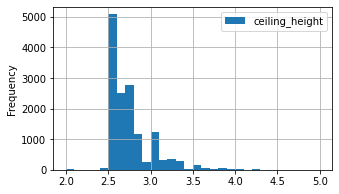

In [21]:
data.plot(y ='ceiling_height', kind ='hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Высота потолков в большинстве случаев находится на уровне среднего значения - 2,65м. Это связано с тем, что на этапе предобработки данных все пропуски и аномальные значения были заменены на медианное значение. Но даже с учетом этого можно сказать, что на рынке гораздо реже встречаются квартиры с высотой потолков более 3м. Также крайне мало квартир с минимальной высотой (2,4м).

**Изучим время продажи квартиры**

count    23611.000000
mean       156.590403
std        213.510349
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

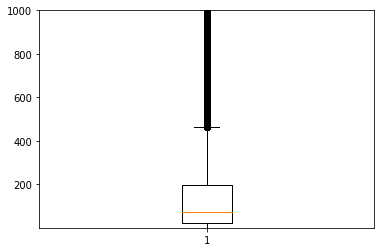

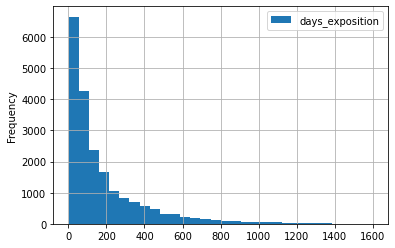

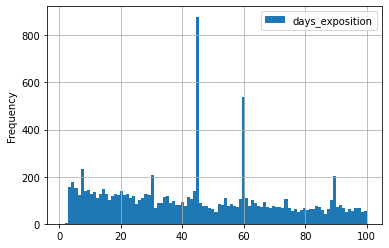

In [22]:
plt.boxplot(data['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,100))
data['days_exposition'].describe()


Графики представляют собой распределение Пуассона.
Среднее значение 156 дней, а медиана - 74 дня. Однако, нужно учитывать, что снятие объявления с публикации не всегда может быть связано с продажей квартиры. Также как и то, что 0 - это пропущенные значения в данных, которые на этапе предобработки данных мы не стали ничем заменять.
Наиболее популярные дни для снятия объявлений с продажи - это 30,45,60,90. Вероятнее всего, это связано не с реальной продажей квартиры, а со сроком размещения объявления на сервисе Яндекс.Недвижимость. 
Также есть и аномальные значения, например, максимальное количество дней, которое объявление было размещено на сервисе - 1580 дней. Это необоснованно долго и вряд ли соответствует действительности. 
Определим, какие еще значения могут считаться аномальными. Для этого посмотрим межквартильный размах (от 45 до 240 дней).
При этом на графике мы видим значения от 0 до примерно 520 дней. Значит, все значения выше - также необоснованно долгие.

**Уберем редкие и выбивающие значения**

Для этого отфильтруем данные и сохраним их в новый датафрейм

(1.0, 1000.0)

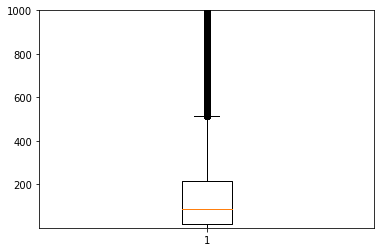

In [23]:
good_data = data.query('days_exposition not in (7,30,45,60,90)')
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

count    21551.000000
mean       167.020231
std        220.580446
min          0.000000
25%         20.000000
50%         86.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

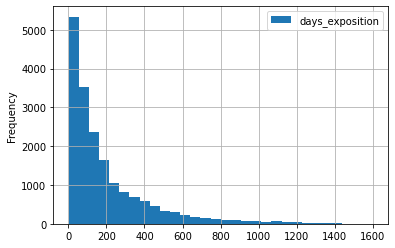

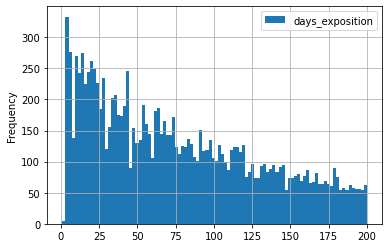

In [24]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()


Теперь данные очищены от аномальных значений, и можно проанализировать новые гистограммы.
Т.к. мы убрали аномально большие значения, среднее значение и медиана изменились (стали 197 и 116 соответственно).
Если смотреть диаграмму размаха, то видим, нормальные значения расположились в диапазоне от 1 до 600 дней. 

(1.0, 70.0)

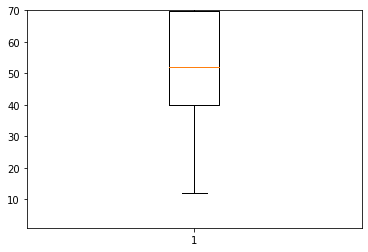

In [25]:
good_area = data.query('total_area !=900')
plt.boxplot(good_area['total_area'])
plt.ylim(1,70)

(1.0, 5.0)

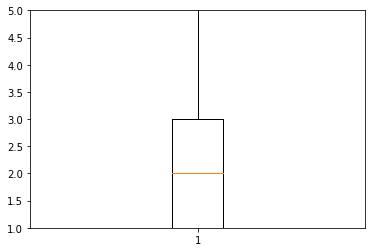

In [26]:
good_rooms = data.query('rooms !=19')
plt.boxplot(good_rooms['rooms'])
plt.ylim(1,5)

**Какие факторы больше всего влияют на стоимость квартиры?**

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
Для определения зависимости рассчитаем коэффициенты корреляции.

0.6535794400414481

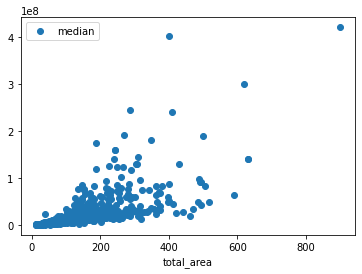

In [27]:
total_area_price = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
total_area_price.columns = ['mean', 'count', 'median']
total_area_price.plot(y = 'median', style = 'o')
total_area_price.sort_values('median', ascending = False)
data['total_area'].corr(data['last_price'])

Коэффициент корреляции составил 0,65. Это значит, что есть прямая зависимость между ценой и площадью. Площадь оказывает наибольшее влияние на цену квартиры. Также могут влиять месторасположение, удаленность от центра, инфраструктура вблизи жилого дома и т.д.
Проверим корреляцию междуценой и числом комнат.

0.3631221062536366

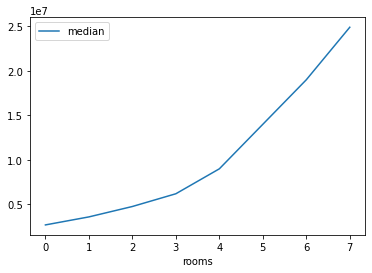

In [28]:
price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_rooms.columns = ['mean', 'count', 'median']
price_rooms.query('count > 50').plot(y = 'median')

price_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Коэффициент корреляции равен 0,36. Т.е. связь между этими параметрами есть. Если посмотреть на график, то можно увидеть, что чем больше комнат, тем больше цена квартиры. 
В целом, это выглядит логично, т.к. 1-3хкомнатные квартиры - это самый распространенный вариант. Четыре, пять и более комнат встречается реже, это уже более элитное современное жилье большой площади, поэтому и рост цены понятен.
Проанализируем зависимость цены и удаленности от центра.

In [29]:
price_cityCenter = data.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_cityCenter.columns = ['mean', 'count', 'median']
data['cityCenters_nearest'].corr(data['last_price'])

-0.20624152445717997

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

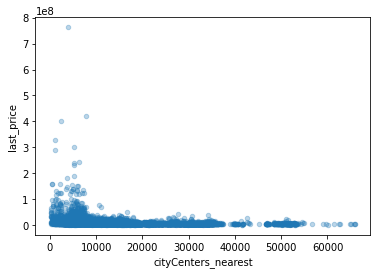

In [30]:
data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

На графике четко видна зависимость между близостью к центру и ценой за квадратный метр. Чем ближе к центру, тем квартиры дороже.
Проверим, зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.

<AxesSubplot:xlabel='floor_category'>

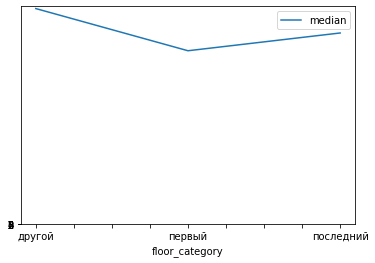

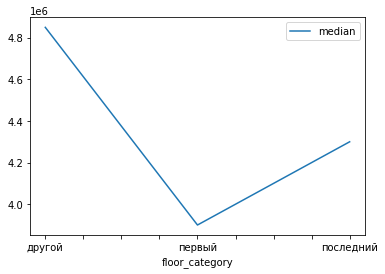

In [31]:
price_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_floor_category.columns =['mean', 'count', 'median']
price_floor_category.plot(y ='median')
plt.yticks([0,1,2,3,4,5])
price_floor_category.plot(y ='median')

Наибольшую стоимость имеют квартиры не на крайних этажах. Наименьшая стоимость квадратного метра квартир на первом этаже, и чуть выше цена квартир на последнем этаже.

**Изучим зависимость цены квадратного метра от даты размещения.**

Сначала по дням недели

,mean,count,median
weekday,,,
1,6.390112e+06,4170,4725000
2,6.631800e+06,3956,4700000
0,6.519826e+06,3601,4650000
3,6.704344e+06,4284,4650000
4,6.367272e+06,3988,4577500
5,6.980411e+06,1922,4550000
6,6.238971e+06,1690,4540000


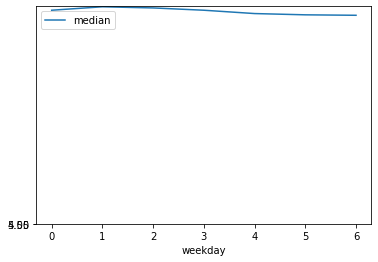

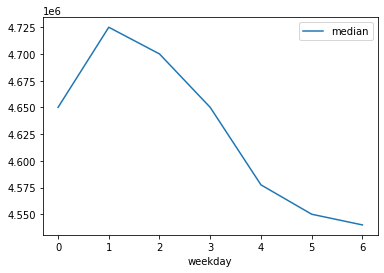

In [32]:
price_weekday = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_weekday.columns = ['mean', 'count', 'median']
price_weekday.plot(y = 'median')
plt.yticks([4.55, 5])
price_weekday.plot(y = 'median')

price_weekday.sort_values('median', ascending = False)

На графике видна следующая тенденция: ко вторнику цена несколько повышается и становится максимальной, а затем плавно начинает снижаться. Чуть большее снижение происходит к пятницу, и в субботу происходит резкое снижение цены до минимального значения.Затем цена снова начинает расти. 
Такую ситуацию на рынке сложно однозначно прокомментировать и назвать точную причину, можно только предположить, из-за чего так произошло. Возможно, в начале недели происходит увеличение количества объектов недвижимости на рынке. Агентства недвижимости в начале рабочей недели обрабатывают поступившие звявки на продажу и размещают объявления выставляя первоначально максимальную цену. К середине недели на некоторые объекты, которые долго не продаются, делают скидки. И максимальные скидки предоставляются в конце недели и в субботу, т.к. это время наибольшего числа просмотров. Скорее всего, покупали смотрят квартиры в большинстве случаев после работы или в выходные дни. И согласовывая покупку, договариваются о скидке.

**Теперь посмотрим, как на цену влияет месяц покупки.**

,mean,count,median
month,,,
4,6.737882e+06,2362,4800000
9,6.836874e+06,1973,4700000
11,6.449008e+06,2364,4700000
12,7.011731e+06,1641,4700000
2,6.467983e+06,2637,4650000
3,6.356274e+06,2580,4650000
7,6.648568e+06,1690,4650000
1,6.665449e+06,1496,4600000
8,6.343181e+06,1741,4570000


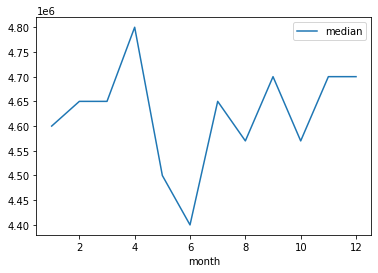

In [33]:
price_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean','count','median'])
price_month.columns = ['mean', 'count', 'median']
price_month.plot(y = 'median')

price_month.sort_values('median', ascending = False)

Исследование показывает, что рынок недвижимости подвержен сезонным изменениям. Самая высокая цена за 1 кв.м. наблюдается в апреле, сентябре и декабре, а самая низкая в мае-июне. 
График выглядит логичным и объяснимым. Цены зависят от спроса, а в январе деловая активность на рынке недвижимости снижается в связи с большим количеством праздников. К апрелю спрос повышается, соответсвенно, цены растут, а на майские праздники и до середины лета происодит снижение. Покупатели уходят в отпуска, откладывая решение квартирного вопроса на более поздний срок, а продавцы, которые не успели продать жилье раньше, снимают объекты с продажи, рассчитывая вернуться на рынок осенью, когда цены снова начнут расти. Пик продаж приходится на конец года, на декабрь. Многие хотят решить жилищный вопрос до Нового года, и в целом декабрь - это лидер по продажам и ценам не только на рынке недвижимости.

**Проанализируем зависимости цены на недвижимость в зависимости от года**

,mean,count,median
year,,,
2014,1.208714e+07,137,7700000
2015,8.575612e+06,1184,5312500
2019,6.779324e+06,2871,5050000
2018,5.953426e+06,8490,4555000
2016,6.827605e+06,2763,4550000
2017,6.582439e+06,8166,4500000


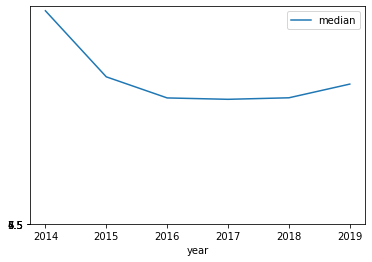

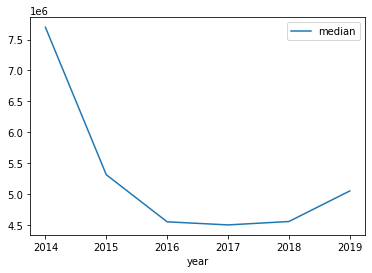

In [34]:
price_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_year.columns = ['mean', 'count', 'median']
price_year.plot(y = 'median')
plt.yticks([4.5, 5.5, 6.5, 7.5])
price_year.plot(y = 'median')
price_year.sort_values('median', ascending = False)

На графике можно наблюдать резкое снижение цен на недвижимость на протяжении 2014г. и к 2016г. цены достигли минимального значения за анализируемый период времени. Это связано с политическим кризисом 2014-2016гг. В отношении России были введены санкции, валюта сильно подорожала по отношению к рублю, ЦБ РФ поднял ключевую ставку, соответственно, увеличились ставки по ипотечным кредитам. Это не могло не сказаться на спросе на недвижимость и цены. 

Стоит отметить, что для анализа мы берем медианные значения, которые характеризуют ситуацию в целом. Если рассматривать рынок недвижимости по сегментам (новое жилье и вторичное), наверняка можно увидеть, что на новое жилье цены стали расти из-за удорожания стоимости материалов. 

Начиная с 2016гг. рынок недвижимости стал постепенно восстанавливаться, цены начали расти, но к концу 2019г. так и не достигли докризисного уровня. 

**Десять населённых пунктов с наибольшим числом объявлений**

На данном этапе исследования выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах

In [35]:
locality_price = data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
locality_price.columns = ['count', 'mean']
locality_price = locality_price.sort_values('count', ascending = False).head(10)
locality_price

,count,mean
locality_name,,
Санкт-Петербург,15650,8.065156e+06
посёлок Мурино,520,3.671211e+06
посёлок Шушары,439,4.109809e+06
Всеволожск,398,3.789068e+06
Пушкин,369,6.469036e+06
Колпино,338,3.964021e+06
посёлок Парголово,327,4.488075e+06
Гатчина,307,3.488337e+06
деревня Кудрово,299,4.234158e+06


In [36]:
locality_price[locality_price['mean']==locality_price['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15650,8.065156e+06


In [37]:
locality_price[locality_price['mean']==locality_price['mean'].min()]

,count,mean
locality_name,,
Выборг,237,3.250983e+06


Из сформированных данных по количеству объявлений населенным пунктом с самыми высокими ценами на недвижимость ожидаемо оказался Санкт-Петербург, а с самыми низкими ценами - Гатчина.

**Определим, какая область относится к центру Санкт-Петербурга**

,last_price
cityCenters_nearest_km,
1,1.885085e+07
2,1.616331e+07
3,1.345283e+07
4,1.358609e+07
5,1.530528e+07
6,1.438911e+07
7,1.279767e+07
8,8.430806e+06
9,6.429619e+06


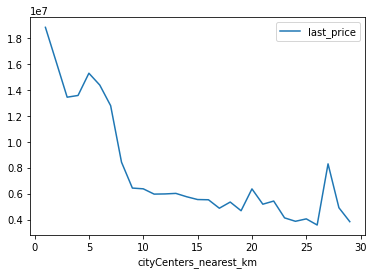

In [38]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int32')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=0').pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

На графике представлена зависимость цены 1 кв.м. жилья от удаленности объекта от центра Санкт-Петербурга. Судя по графику, центром города можно считать площадь с радиусом 8-9 км.

**Выделим сегмент квартир в центре и проанализируем их**

Зависимость стоимости квадратного метра от количества комнат. 
Сначала выделим центр, основываясь на предыдущих расчетах.

In [39]:
center_data = data.query('cityCenters_nearest_km <= 8 and locality_name == "Санкт-Петербург"')

0.3465388468978129

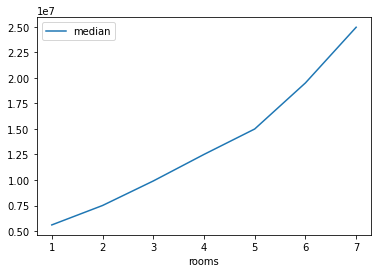

In [40]:
center_rooms = center_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_rooms.columns = ['mean', 'count', 'median']
center_rooms.query('count > 50').plot(y = 'median')

center_rooms.query('count > 50').sort_values('median', ascending = False)

center_data['rooms'].corr(center_data['last_price'])

Коэффициент корреляции равен 0,35, что свидетельствует, что взаимосвязь между количеством комнат и ценой небольшая. На цену квартиры влияют другие факторы.

Зависимость стоимости квартиры от этажа:

,mean,count,median
floor_category,,,
другой,1.365376e+07,3224,9000000
первый,8.777036e+06,470,6300000
последний,1.758368e+07,738,8994500


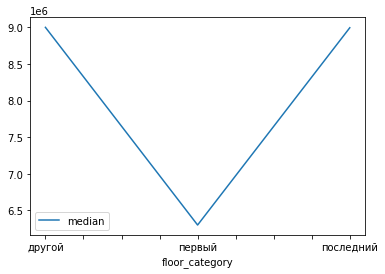

In [41]:
center_floor_category = center_data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_floor_category.columns = ['mean', 'count', 'median']
center_floor_category.plot(y = 'median')
center_floor_category

Ситуация в центре города полностью совпадает с общей картиной. Первые и последние этажи зданий всегда дешевле, и удаленность от центра тут не играет роли.

Зависимость стоимости квадратного метра от удаленности от центра:

-0.10026105084964253

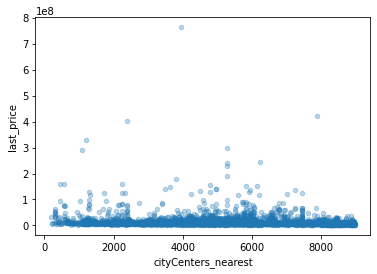

In [42]:
center_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

center_data['cityCenters_nearest'].corr(center_data['last_price'])

Коэффициент корреляции равен -0,1. Тут нет никакой зависимости между параметрами, т.к. выборка изначально сделана по центру города.

Зависимость стоимости квадратного метра от дня недели размещения объявления:

,mean,count,median
weekday,,,
0,1.393291e+07,673,9000000
6,1.393910e+07,264,8900000
3,1.358937e+07,910,8845000
2,1.377945e+07,760,8806000
4,1.321215e+07,742,8500000
1,1.286971e+07,755,8400000
5,1.739682e+07,328,8250000


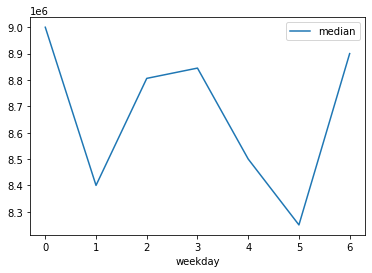

In [43]:
center_weekday= center_data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_weekday.columns = ['mean', 'count', 'median']
center_weekday.plot(y = 'median')

center_weekday.sort_values('median', ascending = False)

Здесь мы можем наблюдать отличия от общей выборки. Цены снижаются к середине недели, а далее начинают расти и к воскресенью достигают максимальных значений. 
Тут сложно выявить какую-то зависимость, она может быть разной в зависимости от выборки. Единственное, что можно предположить с высокой долей вероятности, что снижение цены совпадает с моментом продажи квартиры, и это снижение связано со скидкой, которую, как правило, предоставляет продавец.

Зависимость стоимости квадратного метра от месяца размещения объявления:

,mean,count,median
month,,,
9,1.453846e+07,389,9200000
1,1.450801e+07,273,9000000
11,1.311509e+07,431,9000000
7,1.382774e+07,353,8950000
2,1.388433e+07,469,8850000
5,1.382079e+07,263,8800000
3,1.316727e+07,484,8710840
8,1.288690e+07,325,8600000
6,1.344191e+07,341,8500000


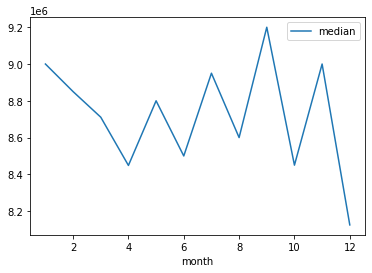

In [44]:
center_month = center_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_month.columns = ['mean', 'count', 'median']
center_month.plot(y = 'median')

center_month.sort_values('median', ascending = False)

В целом, ситуация такая же, как и в общей выборке. Но на примере центрального района города более четко видные изменения цены к каждом месяце. Первые полгода наблюдаются резкие скачки цен, лето, как и везде, - период затишья на рынке недвижимости и дальше снова рост цен.

Зависимость стоимости квадратного метра от года размещения объявления

,mean,count,median
year,,,
2015,1.614521e+07,367,9833970
2016,1.472057e+07,591,9200000
2019,1.390734e+07,518,8700000
2017,1.431642e+07,1557,8600000
2018,1.187125e+07,1361,8490000


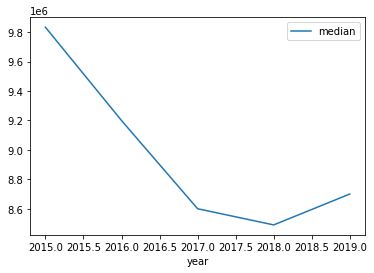

In [45]:
center_year = center_data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_year.columns = ['mean', 'count', 'median']
center_year.query('count > 50').plot(y = 'median')

center_year.query('count > 50').sort_values('median', ascending = False)

Ситуация в центре аналогична общей картине. На протяжении 2015 года наблюдаетя снижение цен на фоне общего кризиса, к началу 2016г. цена продажи достигает минимального значения и дальше начинает расти. С 2018 г. увеличение цен становится более резким.

## Общий вывод

Мы изучили архивные данные объявлений о продаже квартир в Санкт-Петербурге и ближайших населенных пунктов за 2014-2019гг. 

По этим данным проанализировали площадь, цены, число комнат, высоту потолков объектов.
Установили, что 75% жилых объектов Санкт-Петербурга и близлижащих районов имеют общую площадь от 40,6 до 70 кв.м. и находятся в ценовом диапазоне от 3,4 млн руб. до 6,8 млн руб. Высота потолков в большинстве случаев находится на уровне среднего значения - 2,65м. На рынке редко встречаются квартиры с высотой потолков более 3м. Также крайне мало квартир с минимальной высотой (2,4м).

Основные факторы, влияющие на стоимость квартиры - это удаленность от центра и этаж. Первый и последний этаж значительно удешевляют стоимость 1 кв.м. Наиболее дорогое жилье расположено в центре города и не на крайних этажах. Причем эта зависимость характерна как для всей выборки, так и отдельно для центральной части Санкт-Петербурга (радиусом 8км).

Изучая зависимость по времени продажи, а именно по дням недели, месяцу и году, можно отметить, что безусловно большее влияние оказывают месяц и год. День недели может меняться в зависимости от выборки. Самые высокие цены наблюдаются в апреле и декабре - месяцах, когда наименьшее число праздников и отпусков. Летом цены на недвижимость находятся на минимальном уровне (в любой выборке). Кризис 2014-2016гг. сильно повлиял на рынок недвижимости. Цены снижались на протяжении всего 2015 года и к 2016г. достигли минимума за анализируемый период. Затем рынок постепенно стал восстанавливаться, с 2018г. цены на недвижимость в центре Санкт-Петербурга стали резко расти.

Из всех данных выделили населенный пункт с самыми высокими ценами на жилье и с самыми низкими. Самое дорогое жилье в Санкт-Петербуге, а самое дешевое из близлижащих пунктов - в Гатчине.